## Import relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation and save as .npz file

In [2]:
observations = 1000

xs = np.random.uniform(low = -10, high = 10, size=(observations, 1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('WithTF', inputs = generated_inputs, targets = generated_targets)

## Solving the same problem but with TensorFlow

In [3]:
training_data = np.load('WithTF.npz')

In [7]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])
#tf.keras.Sequential() function that specifies how the model will be laid down.
#tf.keras.layers.Dense(output size) is equal like we before used (output = np.dot(inputs,weights) + bias)

model.compile(optimizer='sgd', loss='mean_squared_error')
#model.compile(optimizer, loss) configures the model of training
#SGD stands for Stochastic Gradient Descent
#l2-norm-loss is mean (average) loss

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=0)
#epoch is number of loop
#when verbose is 0, it means silent mode

## Extract the weights and bias

In [10]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

In [11]:
weights

array([[ 2.0223153],
       [-2.97988  ]], dtype=float32)

In [12]:
bias

array([5.001374], dtype=float32)

First weight is 2.0223153, second weight is -2.97988 and bias is 5.001374  
We manually created our weights 2, -3 and bias 5 and our model worked good.
## Plot the data

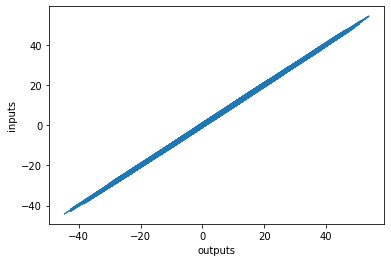

In [13]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('inputs')
plt.show()

The line is as close to 45 degrees. It means our model works perfectly